In [2]:
from gluonts.dataset.repository.datasets import get_dataset

In [43]:
from gluonts.dataset.util import to_pandas
import matplotlib.pyplot as plt

In [48]:
dataset_names = ['constant', 'exchange_rate', 'solar-energy', 'electricity',
                 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips',
                 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing',
                 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly',
                 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing',
                 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'm3_monthly',
                 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 
                 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5']

In [217]:
i = 3

In [218]:
ds = get_dataset(dataset_names[i])

In [229]:
g_electricity = get_dataset('electricity_nips')

In [241]:
[list(g_electricity.train)[i]['start'] for i in range(370)]

[Timestamp('2014-01-14 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp('2014-01-01 00:00:00', freq='H'),
 Timestamp

In [219]:
entry = next(iter(ds.train))
train_series = to_pandas(entry)
entry = next(iter(ds.test))
test_series = to_pandas(entry)

In [226]:
train_series

2012-01-01 00:00:00    14.0
2012-01-01 01:00:00    18.0
2012-01-01 02:00:00    21.0
2012-01-01 03:00:00    20.0
2012-01-01 04:00:00    22.0
                       ... 
2014-05-26 15:00:00     4.0
2014-05-26 16:00:00     8.0
2014-05-26 17:00:00     6.0
2014-05-26 18:00:00     9.0
2014-05-26 19:00:00     7.0
Freq: H, Length: 21044, dtype: float32

In [227]:
test_series

2012-01-01 00:00:00    14.0
2012-01-01 01:00:00    18.0
2012-01-01 02:00:00    21.0
2012-01-01 03:00:00    20.0
2012-01-01 04:00:00    22.0
                       ... 
2014-05-27 15:00:00     2.0
2014-05-27 16:00:00     6.0
2014-05-27 17:00:00     8.0
2014-05-27 18:00:00     8.0
2014-05-27 19:00:00     6.0
Freq: H, Length: 21068, dtype: float32

In [ ]:
train_series.reset_index().merge(test_series.reset_index(), how = 'outer').set_index('index').plot()



In [228]:
140256, train_series.shape

(140256, (21044,))

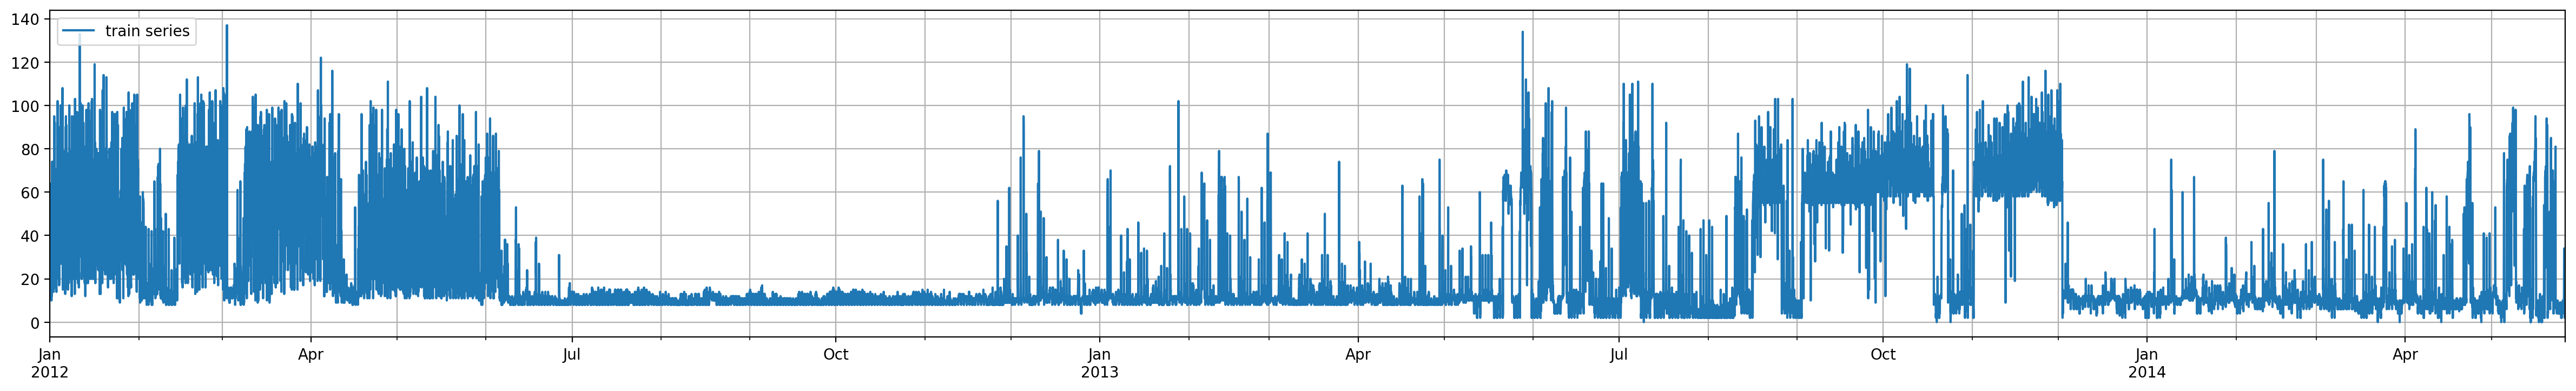

In [225]:
plt.figure(figsize = (30, 4), dpi = 200)
train_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()

In [211]:
train_series.reset_index().merge(test_series.reset_index(), how = 'outer')

,index,0
0,2014-01-14 00:00:00,84.101379
1,2014-01-14 01:00:00,93.317970
2,2014-01-14 02:00:00,92.165901
3,2014-01-14 03:00:00,101.958527
4,2014-01-14 04:00:00,104.262672
...,...,...
5540,2014-09-01 20:00:00,107.718895
5541,2014-09-01 21:00:00,112.903229
5542,2014-09-01 22:00:00,71.428574
5543,2014-09-01 23:00:00,58.755760


In [212]:
test_series = train_series.reset_index().merge(test_series.reset_index(), how = 'outer')

In [213]:
test_series.columns = ['ds', 'y']

In [214]:
dataset_names[i]

'electricity_nips'

In [215]:
test_series.to_pickle(f'../data/02_intermediate/{dataset_names[i]}_0.pickle')

In [216]:
ds.metadata.freq

'H'

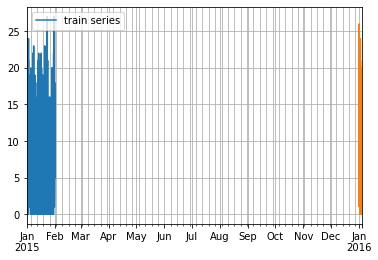

In [66]:

train_series.plot()
test_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()

In [53]:
train_series

1990-01-01    0.785500
1990-01-02    0.781800
1990-01-03    0.786700
1990-01-04    0.786000
1990-01-05    0.784900
                ...   
2013-04-02    1.027591
2013-04-03    1.022349
2013-04-04    1.023395
2013-04-05    1.023552
2013-04-08    1.025347
Freq: B, Length: 6071, dtype: float32

In [32]:
import logging
from collections import OrderedDict
from functools import partial
from pathlib import Path

from gluonts.dataset.artificial import ConstantDataset
from gluonts.dataset.common import TrainDatasets, load_datasets
from gluonts.dataset.repository._artificial import generate_artificial_dataset
from gluonts.dataset.repository._gp_copula_2019 import (
    generate_gp_copula_dataset,
)
from gluonts.dataset.repository._lstnet import generate_lstnet_dataset
from gluonts.dataset.repository._m3 import generate_m3_dataset
from gluonts.dataset.repository._m4 import generate_m4_dataset
from gluonts.dataset.repository._m5 import generate_m5_dataset
from gluonts.dataset.repository._tsf_datasets import (
    generate_forecasting_dataset,
)
from gluonts.support.util import get_download_path

dataset_recipes = OrderedDict(
    {
        # each recipe generates a dataset given a path
        "constant": partial(
            generate_artificial_dataset, dataset=ConstantDataset()
        ),
        "exchange_rate": partial(
            generate_lstnet_dataset, dataset_name="exchange_rate"
        ),
        "solar-energy": partial(
            generate_lstnet_dataset, dataset_name="solar-energy"
        ),
        "electricity": partial(
            generate_lstnet_dataset, dataset_name="electricity"
        ),
        "traffic": partial(generate_lstnet_dataset, dataset_name="traffic"),
        "exchange_rate_nips": partial(
            generate_gp_copula_dataset, dataset_name="exchange_rate_nips"
        ),
        "electricity_nips": partial(
            generate_gp_copula_dataset, dataset_name="electricity_nips"
        ),
        "traffic_nips": partial(
            generate_gp_copula_dataset, dataset_name="traffic_nips"
        ),
        "solar_nips": partial(
            generate_gp_copula_dataset, dataset_name="solar_nips"
        ),
        "wiki-rolling_nips": partial(
            generate_gp_copula_dataset, dataset_name="wiki-rolling_nips"
        ),
        "taxi_30min": partial(
            generate_gp_copula_dataset, dataset_name="taxi_30min"
        ),
        "kaggle_web_traffic_with_missing": partial(
            generate_forecasting_dataset,
            dataset_name="kaggle_web_traffic_with_missing",
        ),
        "kaggle_web_traffic_without_missing": partial(
            generate_forecasting_dataset,
            dataset_name="kaggle_web_traffic_without_missing",
        ),
        "kaggle_web_traffic_weekly": partial(
            generate_forecasting_dataset,
            dataset_name="kaggle_web_traffic_weekly",
        ),
        "m1_yearly": partial(
            generate_forecasting_dataset, dataset_name="m1_yearly"
        ),
        "m1_quarterly": partial(
            generate_forecasting_dataset, dataset_name="m1_quarterly"
        ),
        "m1_monthly": partial(
            generate_forecasting_dataset, dataset_name="m1_monthly"
        ),
        "nn5_daily_with_missing": partial(
            generate_forecasting_dataset, dataset_name="nn5_daily_with_missing"
        ),
        "nn5_daily_without_missing": partial(
            generate_forecasting_dataset,
            dataset_name="nn5_daily_without_missing",
        ),
        "nn5_weekly": partial(
            generate_forecasting_dataset, dataset_name="nn5_weekly"
        ),
        "tourism_monthly": partial(
            generate_forecasting_dataset, dataset_name="tourism_monthly"
        ),
        "tourism_quarterly": partial(
            generate_forecasting_dataset, dataset_name="tourism_quarterly"
        ),
        "tourism_yearly": partial(
            generate_forecasting_dataset, dataset_name="tourism_yearly"
        ),
        "m3_monthly": partial(generate_m3_dataset, m3_freq="monthly"),
        "m3_quarterly": partial(generate_m3_dataset, m3_freq="quarterly"),
        "m3_yearly": partial(generate_m3_dataset, m3_freq="yearly"),
        "m3_other": partial(generate_m3_dataset, m3_freq="other"),
        "m4_hourly": partial(
            generate_m4_dataset,
            m4_freq="Hourly",
            pandas_freq="H",
            prediction_length=48,
        ),
        "m4_daily": partial(
            generate_m4_dataset,
            m4_freq="Daily",
            pandas_freq="D",
            prediction_length=14,
        ),
        "m4_weekly": partial(
            generate_m4_dataset,
            m4_freq="Weekly",
            pandas_freq="W",
            prediction_length=13,
        ),
        "m4_monthly": partial(
            generate_m4_dataset,
            m4_freq="Monthly",
            pandas_freq="M",
            prediction_length=18,
        ),
        "m4_quarterly": partial(
            generate_m4_dataset,
            m4_freq="Quarterly",
            pandas_freq="Q",
            prediction_length=8,
        ),
        "m4_yearly": partial(
            generate_m4_dataset,
            m4_freq="Yearly",
            pandas_freq="Y",
            prediction_length=6,
        ),
        "m5": partial(
            generate_m5_dataset, pandas_freq="D", prediction_length=28
        ),
    }
)

In [47]:
dataset_recipes.keys()

odict_keys(['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5'])

In [38]:
dataset_names = list(dataset_recipes.keys())

default_dataset_path = get_download_path() / "datasets"